In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score

In [2]:
import pandas as pd
import numpy as np

cancer = load_breast_cancer()
dataset = cancer

In [3]:
X = dataset.data
Y = dataset.target
print(np.shape(X), np.shape(Y))

(569, 30) (569,)


In [4]:
# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [5]:
# Create MLP
mlp = MLPClassifier(hidden_layer_sizes=(9,9,9))
# Train
mlp.fit(X_train, y_train)
# Predict
predictions = mlp.predict(X_test)

In [6]:
# Create performance
print ("Confusion Matrix")
print(confusion_matrix(y_test, predictions))
print ("Classification Results")
print(classification_report(y_test, predictions))

Confusion Matrix
[[51  3]
 [64 25]]
Classification Results
             precision    recall  f1-score   support

          0       0.44      0.94      0.60        54
          1       0.89      0.28      0.43        89

avg / total       0.72      0.53      0.49       143



In [7]:
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
print(precision, recall)

0.723161620987708 0.5314685314685315


In [8]:
hidden_layers = range(1,30)
precisions = []
recalls = []

for h in hidden_layers:
    mlp = MLPClassifier(hidden_layer_sizes=(9,)*h)
    mlp.fit(X_train, y_train)
    predictions = mlp.predict(X_test)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    precisions.append(precision)
    recalls.append(recall)

C:\Users\user\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


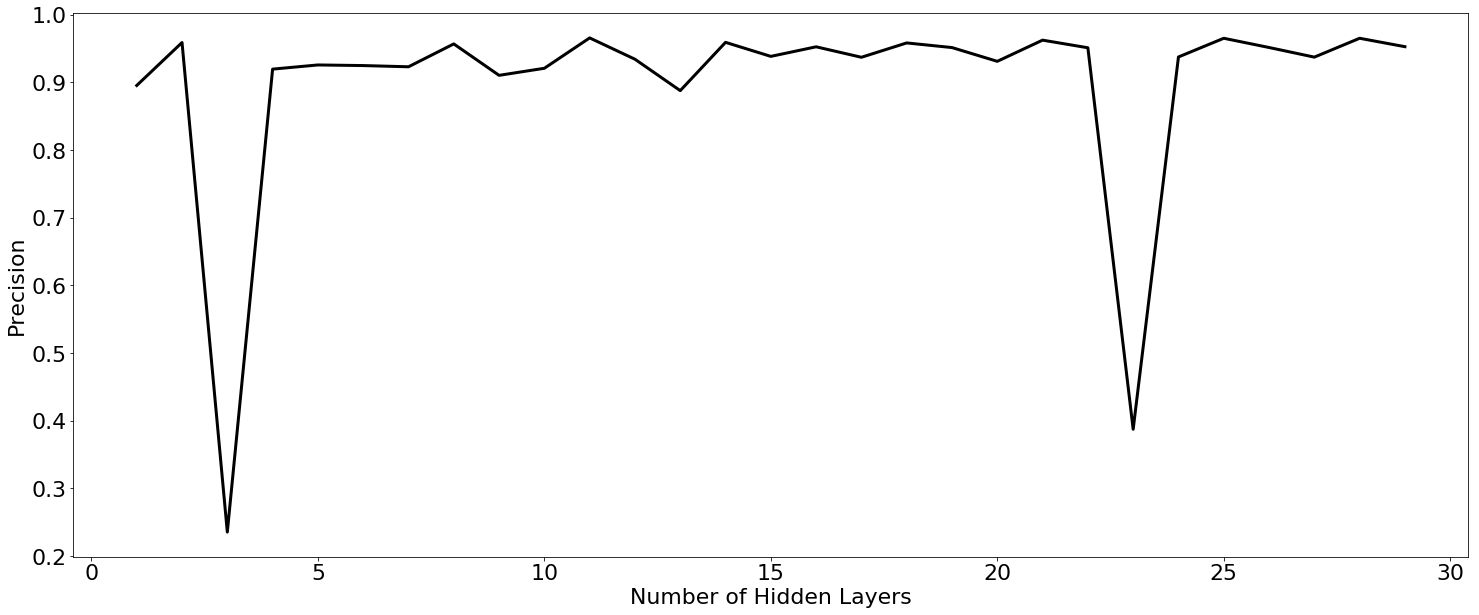

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(25,10))

ax.plot(hidden_layers, precisions, '-k', linewidth=3)
ax.set_xlabel("Number of Hidden Layers", fontsize=22)
ax.set_ylabel("Precision", fontsize=22)

plt.sca(ax)
plt.tick_params(axis='both', which='major', labelsize=22)

In [10]:
x_range = np.arange(-10, 10, 0.1)

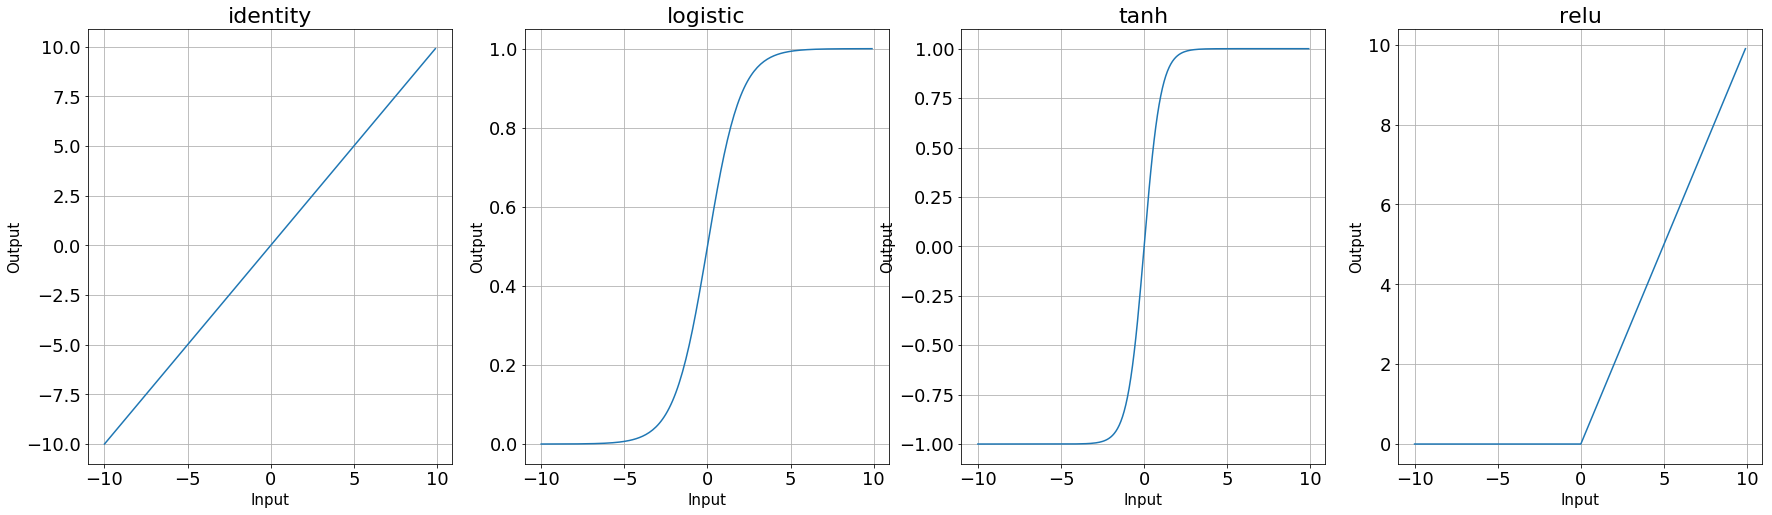

In [11]:
def identity(x):
    return x

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x_range)

fig, axes = plt.subplots(1,4, figsize=(30,8))

axes[0].plot(x_range, identity(x_range))
axes[1].plot(x_range, logistic(x_range))
axes[2].plot(x_range, tanh(x_range))
axes[3].plot(x_range, relu(x_range))

names = ('identity', 'logistic', 'tanh', 'relu')
for i, ax in enumerate(axes):
    axes[i].set_title(names[i], fontsize=22)
    plt.sca(ax)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.xlabel('Input', fontsize=15)
    plt.ylabel('Output', fontsize=15)
    plt.grid()

C:\Users\user\AppData\Roaming\Python\Python36\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\user\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


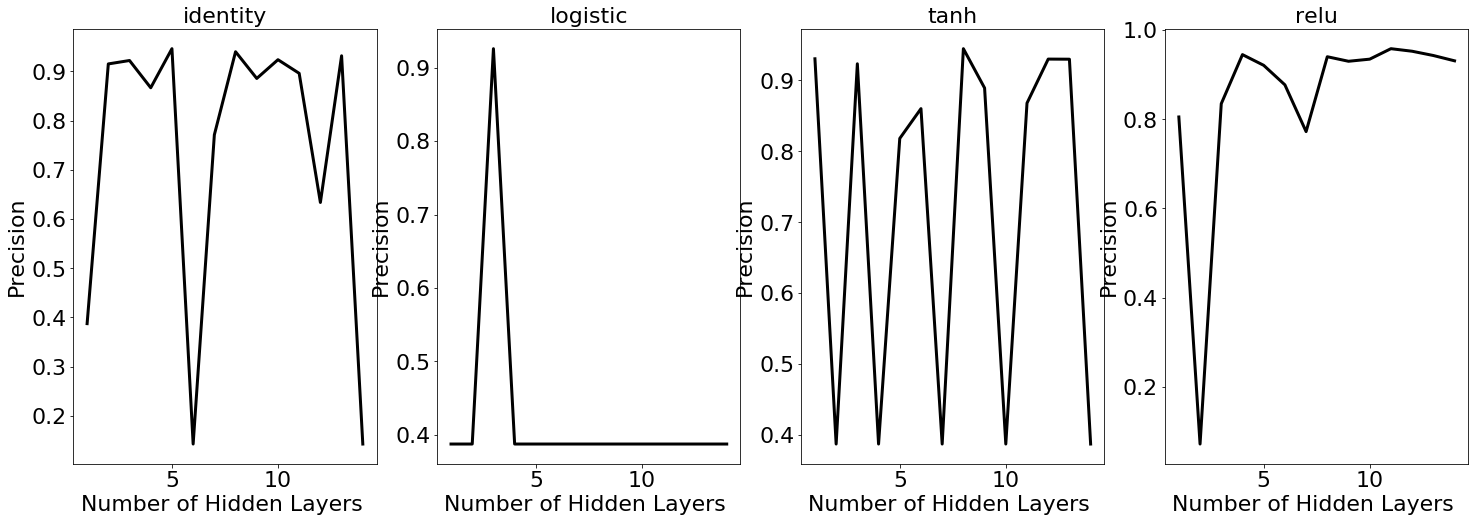

In [17]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,4,figsize=(25,8))


cancer = load_breast_cancer()
dataset = cancer

X = dataset.data
Y = dataset.target

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)
hidden_layers = range(1,15)
activations  = ['identity', 'logistic', 'tanh', 'relu']

for i,a in enumerate(activations):

    precisions = []
    recalls = []
    
    for h in hidden_layers: 
        mlp = MLPClassifier(hidden_layer_sizes=(9,)*h, activation=a)
        mlp.fit(X_train, y_train)
        predictions = mlp.predict(X_test)
        precision = precision_score(y_test, predictions, average='weighted')
        recall = recall_score(y_test, predictions, average='weighted')
        precisions.append(precision)
        recalls.append(recall)
    
    axes[i].plot(hidden_layers, precisions, '-k', linewidth=3)
    axes[i].set_xlabel("Number of Hidden Layers ", fontsize=22)
    axes[i].set_ylabel("Precision", fontsize=22)
    axes[i].set_title(a, fontsize=22)

for ax in axes:
    plt.sca(ax)
    plt.tick_params(axis='both', which='major', labelsize=22)

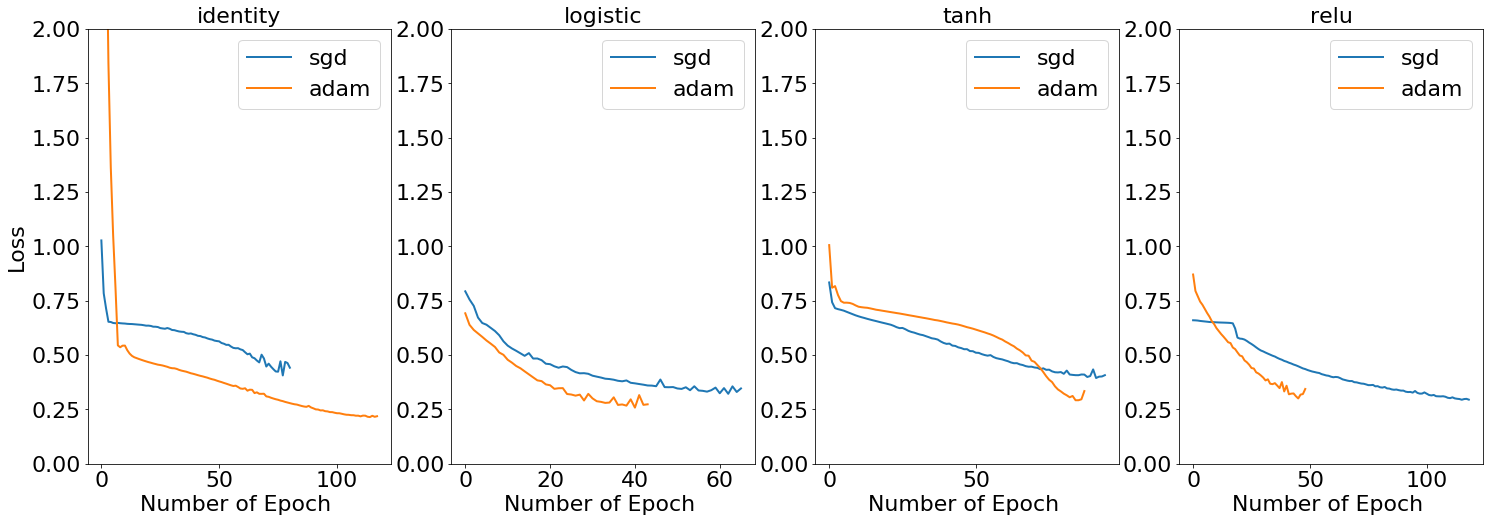

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(1,4,figsize=(25,8))

cancer = load_breast_cancer()
dataset = cancer

X = dataset.data
Y = dataset.target

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

hidden_layers = [10]
activations  = ['identity', 'logistic', 'tanh', 'relu']
# optimizers = ['lbfgs', 'sgd', 'adam']
optimizers = ['sgd', 'adam']

for i,a in enumerate(activations):

    precisions = []
    recalls = []
    
    for o in optimizers:
    
        scores = []
        for h in hidden_layers: 
            mlp = MLPClassifier(hidden_layer_sizes=(9,)*h, solver=o)
            mlp.fit(X_train, y_train)
            score = mlp.score(X_test, y_test)
            scores.append(score)


            axes[i].plot(mlp.loss_curve_, linewidth=2, label=o)
            axes[i].set_xlabel("Number of Epoch ", fontsize=22)
            axes[0].set_ylabel("Loss", fontsize=22)
            
    axes[i].set_title(a, fontsize=22)
    

for ax in axes:
    plt.sca(ax)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.ylim([0,2])
    plt.legend(fontsize=22)

C:\Users\user\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


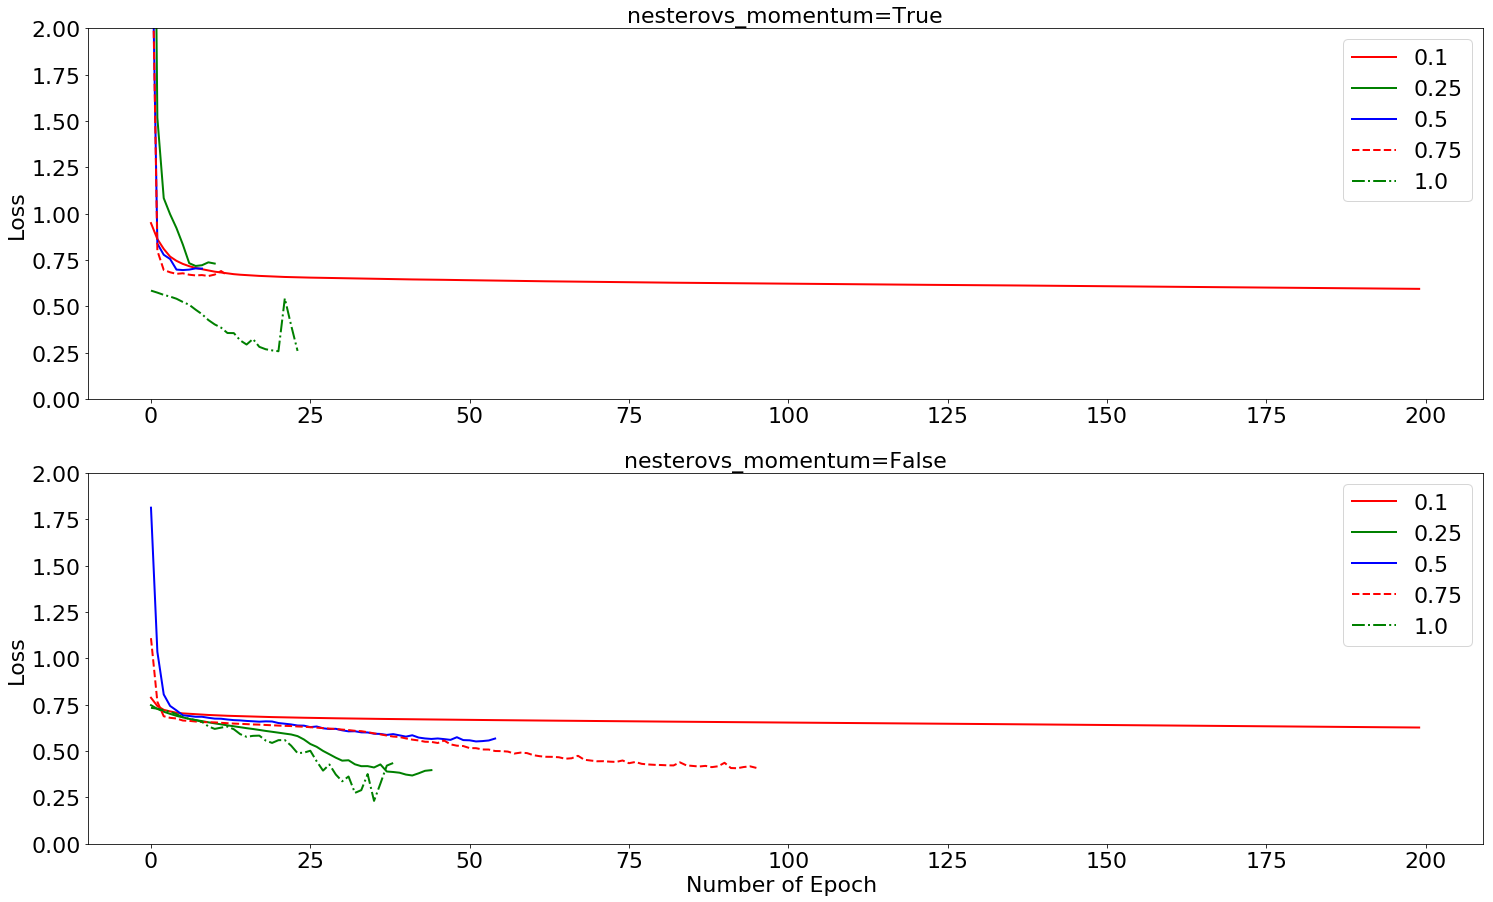

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '-.'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

fig, axes = plt.subplots(2, 1, figsize=(25,15))

cancer = load_breast_cancer()
dataset = cancer

X = dataset.data
Y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

hidden_layers = [10]
activations  = ['identity', 'logistic', 'tanh', 'relu']
optimizers = ['sgd']
momentum =  [0.1,0.25,0.5,0.75,1.0]

for ni, n in enumerate([True, False]):

    for i,m in enumerate(momentum):
        mlp = MLPClassifier(hidden_layer_sizes=(9,)*10, solver='sgd', momentum=m, nesterovs_momentum=n)
        mlp.fit(X_train, y_train)

        axes[ni].plot(mlp.loss_curve_, linewidth=2, label=m, **plot_args[i])
        axes[1].set_xlabel("Number of Epoch ", fontsize=22)
        axes[ni].set_ylabel("Loss", fontsize=22)

        plt.sca(axes[ni])
        plt.tick_params(axis='both', which='major', labelsize=22)
        plt.ylim([0,2])
        plt.legend(fontsize=22)
        
        plt.title("nesterovs_momentum={}".format(str(n)), fontsize=22)

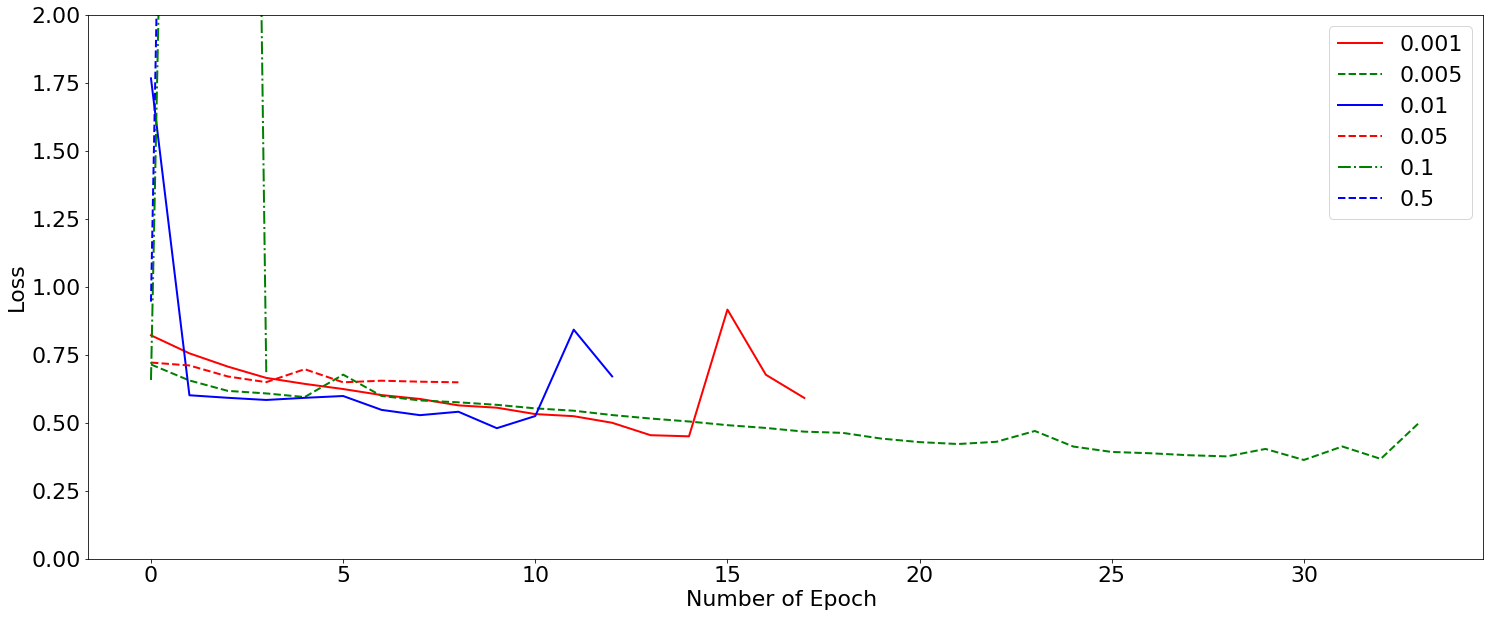

In [21]:
from matplotlib import pyplot as plt
%matplotlib inline

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '-.'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]
fig, axes = plt.subplots(1,1,figsize=(25,10))

cancer = load_breast_cancer()
dataset = cancer

X = dataset.data
Y = dataset.target

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

learning_rate = [0.001,0.005,0.01,0.05,0.1,0.5]

for i,l in enumerate(learning_rate):
    mlp = MLPClassifier(hidden_layer_sizes=(9,)*10, solver='sgd', momentum=0.9,
                        nesterovs_momentum=True, activation='relu', 
                        learning_rate='constant',
                       learning_rate_init=l)
    mlp.fit(X_train, y_train)

    axes.plot(mlp.loss_curve_, linewidth=2, label=l, **plot_args[i])
    axes.set_xlabel("Number of Epoch ", fontsize=22)
    axes.set_ylabel("Loss", fontsize=22)

plt.sca(axes)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylim([0,2])
plt.legend(fontsize=22)


C:\Users\user\AppData\Roaming\Python\Python36\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


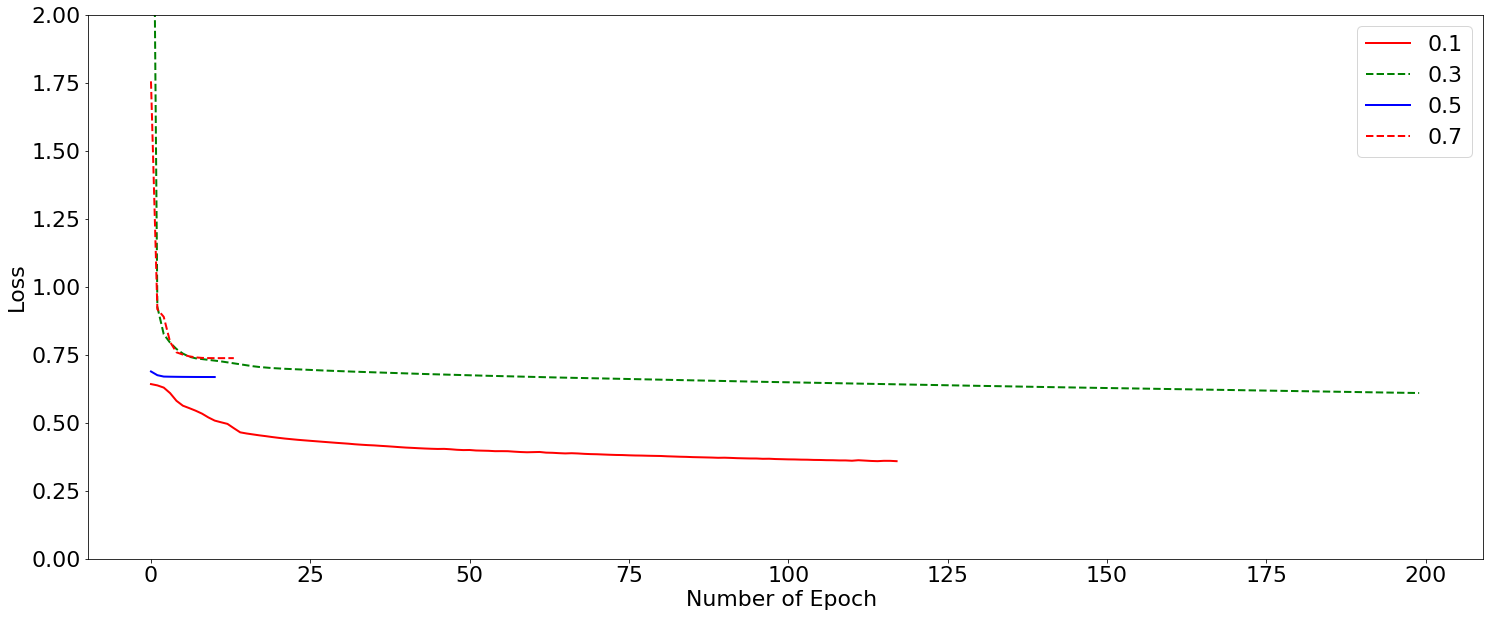

In [24]:
from matplotlib import pyplot as plt
%matplotlib inline

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '-.'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

fig, axes = plt.subplots(1,1,figsize=(25,10))

cancer = load_breast_cancer()
dataset = cancer

X = dataset.data
Y = dataset.target

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)


learning_rate = [3,1,0.5,0.1]
powers = [0.1,0.3,0.5,0.7]


for i,p in enumerate(powers):
    mlp = MLPClassifier(hidden_layer_sizes=(9,)*10, solver='sgd', momentum=0.9,
                        nesterovs_momentum=True, activation='relu', 
                        learning_rate='invscaling',
                       learning_rate_init=0.001,
                       power_t=p,)
    mlp.fit(X_train, y_train)

    axes.plot(mlp.loss_curve_, linewidth=2, label=p, **plot_args[i])
    axes.set_xlabel("Number of Epoch ", fontsize=22)
    axes.set_ylabel("Loss", fontsize=22)

plt.sca(axes)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylim([0,2])
plt.legend(fontsize=22)

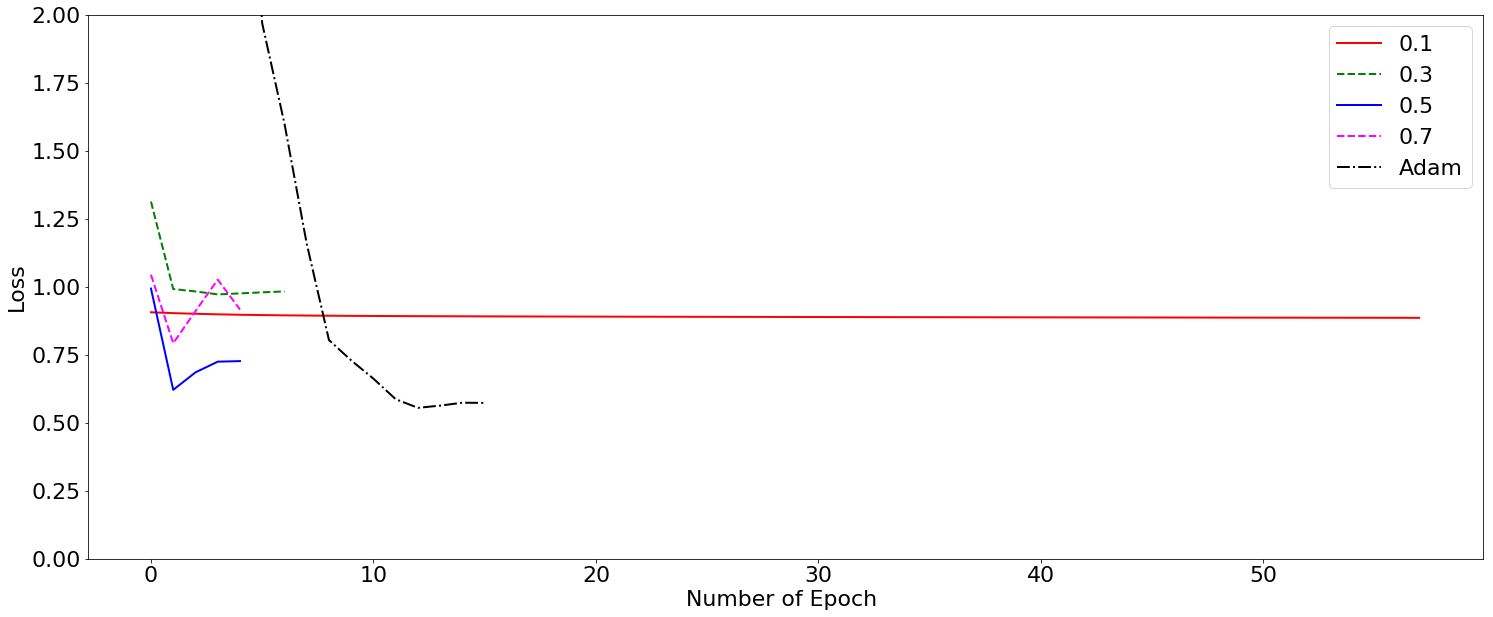

In [27]:
from matplotlib import pyplot as plt
%matplotlib inline

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'magenta', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-.'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

fig, axes = plt.subplots(1,1,figsize=(25,10))

cancer = load_breast_cancer()
dataset = cancer

X = dataset.data
Y = dataset.target

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)


learning_rate = [3,1,0.5,0.1]
powers = [0.1,0.3,0.5,0.7]

for i,p in enumerate(powers):
    mlp = MLPClassifier(hidden_layer_sizes=(9,)*10, solver='sgd', momentum=0.9,
                        nesterovs_momentum=True, activation='relu', 
                        learning_rate='invscaling',
                       learning_rate_init=0.001,
                       power_t=0.5)
    mlp.fit(X_train, y_train)

    axes.plot(mlp.loss_curve_, linewidth=2, label=p, **plot_args[i])
    axes.set_xlabel("Number of Epoch ", fontsize=22)
    axes.set_ylabel("Loss", fontsize=22)

mlp = MLPClassifier(hidden_layer_sizes=(9,)*10, solver='adam', activation='relu', learning_rate_init=0.001)
mlp.fit(X_train, y_train)

axes.plot(mlp.loss_curve_, linewidth=2, label='Adam', **plot_args[i+1])


    
plt.sca(axes)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylim([0,2])
plt.legend(fontsize=22)

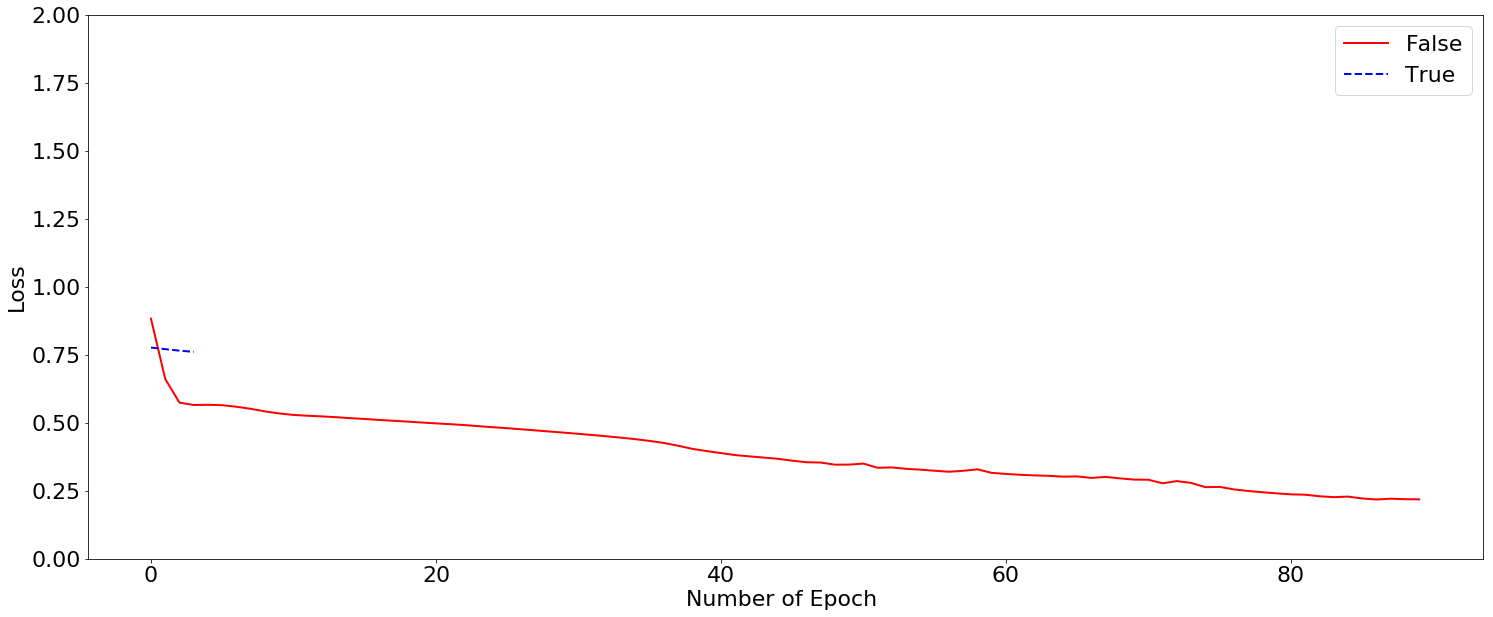

In [28]:
from matplotlib import pyplot as plt
%matplotlib inline

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'magenta', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-.'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

fig, axes = plt.subplots(1,1,figsize=(25,10))

cancer = load_breast_cancer()
dataset = cancer

X = dataset.data
Y = dataset.target

# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42)


learning_rate = [3,1,0.5,0.1]
early = [False, True]

for i,e in enumerate(early):
    mlp = MLPClassifier(hidden_layer_sizes=(9,)*10, solver='adam', activation='relu', 
                        learning_rate_init=0.001, early_stopping=e)
    mlp.fit(X_train, y_train)  

    axes.plot(mlp.loss_curve_, linewidth=2, label=str(e), **plot_args[i])
    axes.set_xlabel("Number of Epoch ", fontsize=22)
    axes.set_ylabel("Loss", fontsize=22)
    
plt.sca(axes)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylim([0,2])
plt.legend(fontsize=22)


        